In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(20,5),'axes.facecolor':'white', 'figure.facecolor':'white',})
sns.set_palette("magma")
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings('ignore')


Mounted at /content/drive


# Exploratory Data Analysis

In [ ]:
def get_x_y(df):
    wind_x = df[df.capacity_f.notna()].iloc[:,13:].dropna()
    wind_y = df.loc[wind_x.index,'capacity_f']
    solar_x = df[df.pv_capacit.notna()].iloc[:,13:].dropna()
    solar_y = df.loc[solar_x.index,'pv_capacit']
    wind_df = df.iloc[wind_x.index,:]
    solar_df = df.iloc[solar_x.index,:]
    return wind_x, wind_y, solar_x, solar_y, wind_df, solar_df

In [ ]:
files = ['ssp2_10_41','ssp2_41_70','ssp5_11_40','ssp5_41_70','normal']
dfs = []
for file in files:
  dfs.append(pd.read_csv(f'{file}.csv'))

### Solar

In [ ]:
wind_x, wind_y, solar_x, solar_y, wind_df, solar_df = get_x_y(dfs[-1])
from sklearn.linear_model import Ridge
solar_x.columns = [col.lower() for col in solar_x.columns]
solar_x = solar_x.sort_index(axis=1)

ridge = Ridge().fit(solar_x,solar_y)
initial_y = ridge.predict(solar_x)
print('Coefficient per X variable for Ridge')
print(pd.DataFrame(solar_x.columns,ridge.coef_))
print(f'lr intercept: {round(ridge.intercept_,5)}')
print('---------------------------------------')
print(f'Ridge train accuracy score: {round(ridge.score(solar_x,solar_y),5)}')
print(f'Ridge test accuracy score: {round(ridge.score(solar_x,solar_y),5)}')

Coefficient per X variable for Ridge
                 0
-0.000050      ahm
 0.000709     bffp
 0.000011      cmd
-0.000080      cmi
-0.000042   dd1040
 0.000080     dd18
-0.000031      dd5
 0.000018     dd_0
-0.000018    dd_18
 0.001339     effp
-0.002780      emt
 0.000082     eref
 0.000192      ext
 0.000192      ffp
 0.000099      map
 0.002611      mar
 0.000087      mat
 0.001378     mcmt
-0.000076      msp
 0.000619     mwmt
-0.000259     nffd
-0.000001      pas
-0.000134   ppt_at
-0.000007   ppt_sm
-0.000048   ppt_sp
-0.000114   ppt_wt
 0.000616       rh
 0.000008      shm
 0.001300  tave_at
 0.000355  tave_sm
-0.000245  tave_sp
-0.000925  tave_wt
-0.000908       td
lr intercept: -0.3613
---------------------------------------
Ridge train accuracy score: 0.90161
Ridge test accuracy score: 0.90161


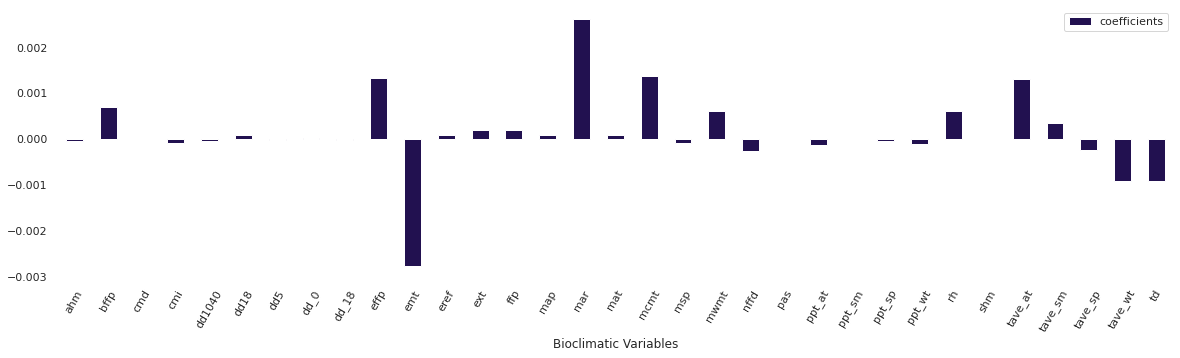

In [ ]:

pd.DataFrame(solar_x.columns,ridge.coef_).reset_index().rename({0:'Bioclimatic Variables','index':'coefficients'},axis=1).set_index('Bioclimatic Variables').plot(kind='bar')
plt.xticks(rotation=60)
plt.savefig('ridge_results.png',bbox_inches='tight')
# Solar Plot locally mar, mcmt, rh

In [ ]:
def pca(x,y):
    from sklearn.decomposition import PCA
    pcan = PCA(2).fit(x)
    pca = PCA(n_components=pcan.n_components_)
    X = pca.fit_transform(x)
    ratio = pca.explained_variance_ratio_
    pca_loadings = pd.DataFrame(pca.components_.T,index=x.columns)
    print(f"The first two components explain {round((ratio[0]+ratio[1])*100,2)}% of the variance ratio. First is {ratio[0]} and second is {ratio[1]}")
    return X,pca_loadings
solar_x.columns = [col.lower() for col in solar_x.columns]
solar_x = solar_x.sort_index()
solar_normal_x, normal_loadings = pca(solar_x, solar_y)

The first two components explain 94.92% of the variance ratio. First is 0.8841076349483229 and second is 0.06509548934024896


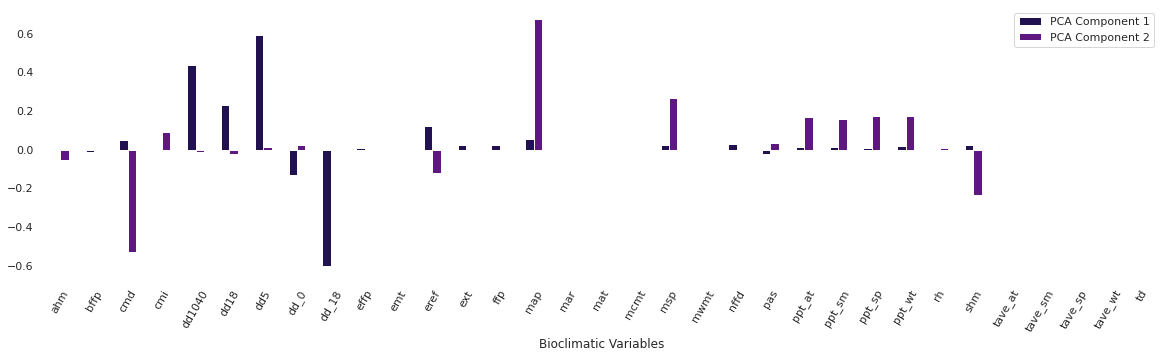

In [ ]:
normal_loadings.reset_index().rename({0:'PCA Component 1',1:'PCA Component 2','index':'Bioclimatic Variables'},axis=1).set_index('Bioclimatic Variables').sort_index().plot(kind='bar')
plt.xticks(rotation=60)
plt.savefig('solarpca_results.png',bbox_inches='tight')

### Wind

In [ ]:
wind_x, wind_y, solar_x, solar_y, wind_df, solar_df = get_x_y(dfs[-1])
from sklearn.linear_model import Ridge
wind_x.columns = [col.lower() for col in wind_x.columns]
wind_x = wind_x.sort_index(axis=1)

ridge = Ridge().fit(wind_x,wind_y)
initial_y = ridge.predict(wind_x)
print('Coefficient per X variable for Ridge')
print(pd.DataFrame(wind_x.columns,ridge.coef_))
print(f'lr intercept: {round(ridge.intercept_,5)}')
print('---------------------------------------')
print(f'Ridge train accuracy score: {round(ridge.score(wind_x,wind_y),5)}')
print(f'Ridge test accuracy score: {round(ridge.score(wind_x,wind_y),5)}')

Coefficient per X variable for Ridge
                 0
-0.000383      ahm
 0.001055     bffp
 0.000617      cmd
 0.007811      cmi
-0.000544   dd1040
 0.000447     dd18
 0.000236      dd5
 0.000064     dd_0
-0.000014    dd_18
 0.001748     effp
-0.001671      emt
 0.000091     eref
 0.000033      ext
 0.000033      ffp
-0.000539      map
-0.006581      mar
-0.002462      mat
 0.009658     mcmt
 0.001059      msp
 0.005854     mwmt
 0.001255     nffd
-0.000055      pas
-0.000521   ppt_at
-0.000676   ppt_sm
 0.000075   ppt_sp
-0.000448   ppt_wt
-0.003975       rh
-0.000035      shm
 0.004490  tave_at
 0.017275  tave_sm
-0.012492  tave_sp
-0.014228  tave_wt
-0.003820       td
lr intercept: -0.45376
---------------------------------------
Ridge train accuracy score: 0.61087
Ridge test accuracy score: 0.61087


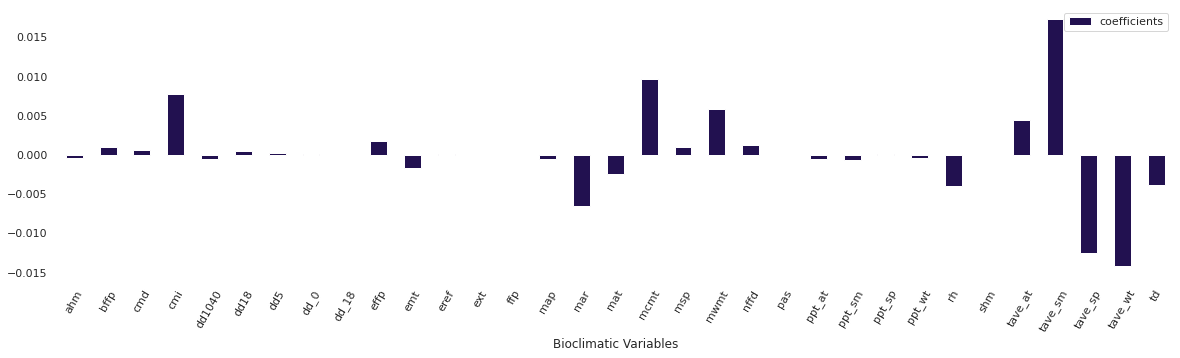

In [ ]:
pd.DataFrame(wind_x.columns,ridge.coef_).reset_index().rename({0:'Bioclimatic Variables','index':'coefficients'},axis=1).set_index('Bioclimatic Variables').plot(kind='bar')
plt.xticks(rotation=60)
plt.savefig('wind_ridge_results.png',bbox_inches='tight')
# Wind Plot locally tave_sm, tave_wt, mcmt

### Plot Regression Plots with Outcome to the three variables
#### Solar

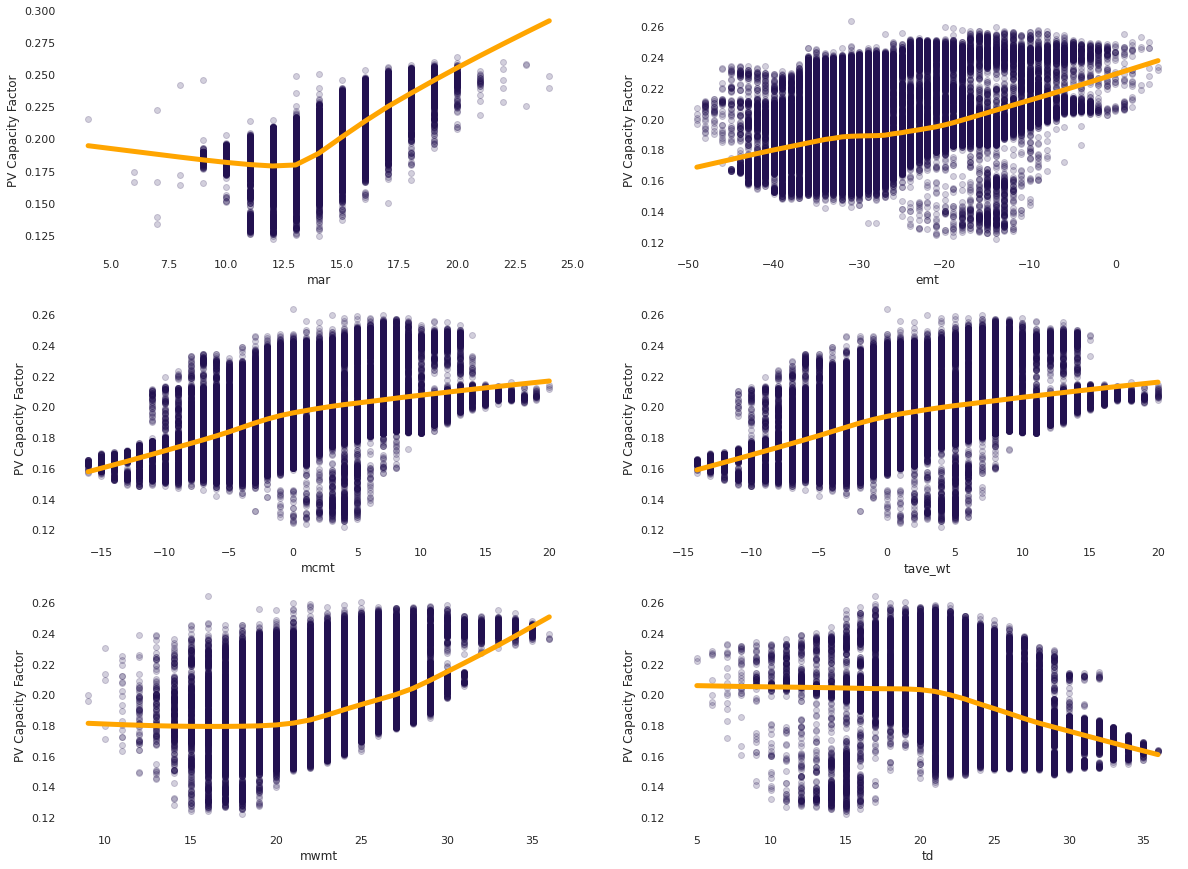

In [ ]:
fig,axs = plt.subplots(3,2,figsize=(20,15))
solar = solar_x.join(solar_y).rename({'pv_capacit':'PV Capacity Factor'},axis=1)
sns.regplot(solar['mar'],solar['PV Capacity Factor'],lowess=True,ax=axs[0,0],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(solar['emt'],solar['PV Capacity Factor'],lowess=True,ax=axs[0,1],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(solar['mcmt'],solar['PV Capacity Factor'],lowess=True,ax=axs[1,0],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(solar['tave_wt'],solar['PV Capacity Factor'],lowess=True,ax=axs[1,1],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(solar['mwmt'],solar['PV Capacity Factor'],lowess=True,ax=axs[2,0],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(solar['td'],solar['PV Capacity Factor'],lowess=True,ax=axs[2,1],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
plt.savefig('solar_x_plots.png',bbox_inches='tight')


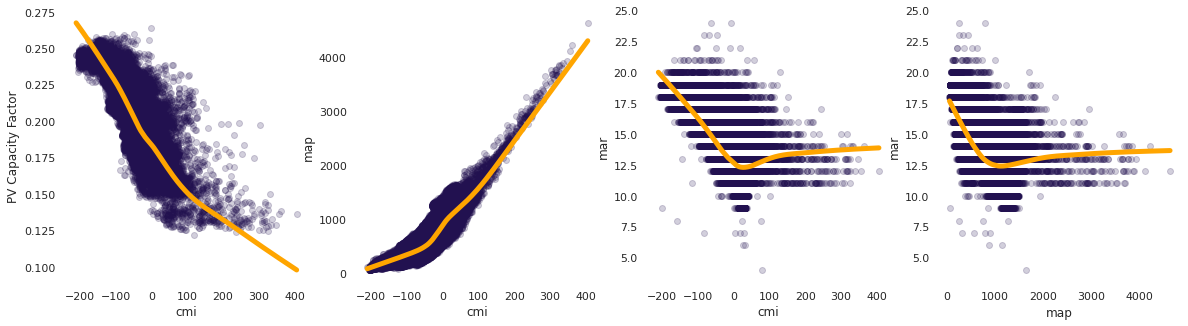

In [ ]:
fig,axs = plt.subplots(1,4,figsize=(20,5))
sns.regplot(solar['cmi'],solar['PV Capacity Factor'],lowess=True,ax=axs[0],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(solar['cmi'],solar['map'],lowess=True,ax=axs[1],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(solar['cmi'],solar['mar'],lowess=True,ax=axs[2],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(solar['map'],solar['mar'],lowess=True,ax=axs[3],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
plt.savefig('solar_x_prec.png',bbox_inches='tight')

#### Wind

In [ ]:
wind_x.join(wind_y).columns

Index(['dd_0', 'dd_18', 'AHM', 'nffd', 'emt', 'ffp', 'mar', 'ppt_at', 'ppt_sp',
       'shm', 'tave_sp', 'MWMT', 'msp', 'eref', 'ext', 'mat', 'ppt_sm', 'rh',
       'tave_sm', 'pas', 'ppt_wt', 'tave_at', 'tave_wt', 'td', 'bffp', 'cmd',
       'effp', 'dd18', 'cmi', 'dd1040', 'dd5', 'mcmt', 'map', 'capacity_f'],
      dtype='object')

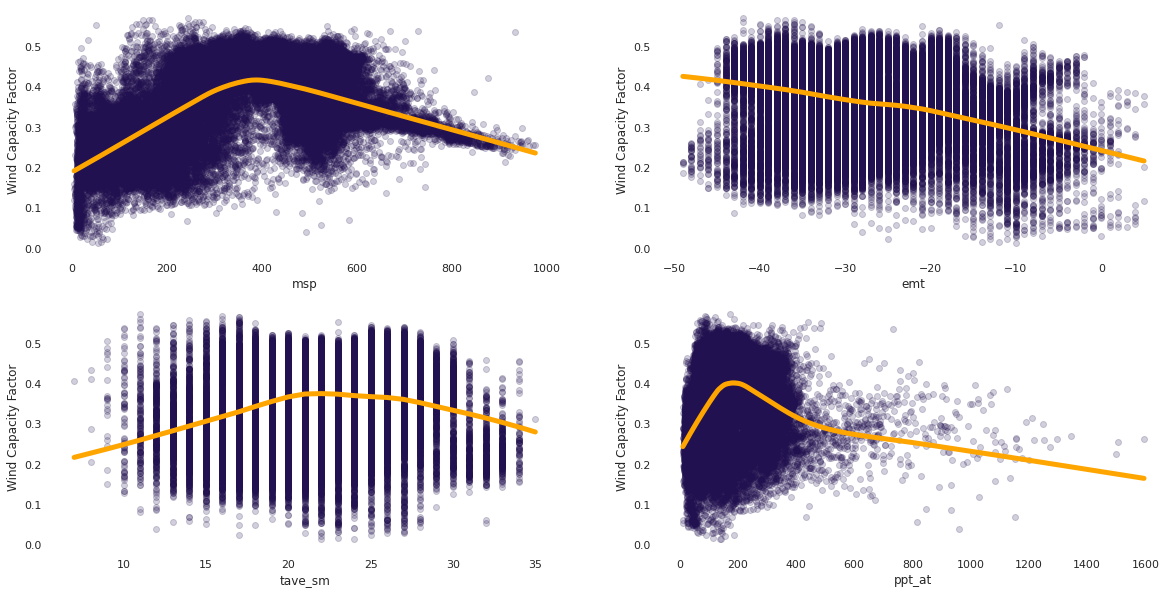

In [ ]:
fig,axs = plt.subplots(2,2,figsize=(20,10))
wind = wind_x.join(wind_y).rename({'capacity_f':'Wind Capacity Factor'},axis=1)
sns.regplot(wind['msp'],wind['Wind Capacity Factor'],lowess=True,ax=axs[0,0],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(wind['tave_sm'],wind['Wind Capacity Factor'],lowess=True,ax=axs[1,0],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(wind['ppt_at'],wind['Wind Capacity Factor'],lowess=True,ax=axs[1,1],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(wind['emt'],wind['Wind Capacity Factor'],lowess=True,ax=axs[0,1],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
# sns.regplot(solar['mwmt'],solar['PV Capacity Factor'],lowess=True,ax=axs[2,0],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
# sns.regplot(solar['td'],solar['PV Capacity Factor'],lowess=True,ax=axs[2,1],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
plt.savefig('wind_xx_plots.png',bbox_inches='tight')


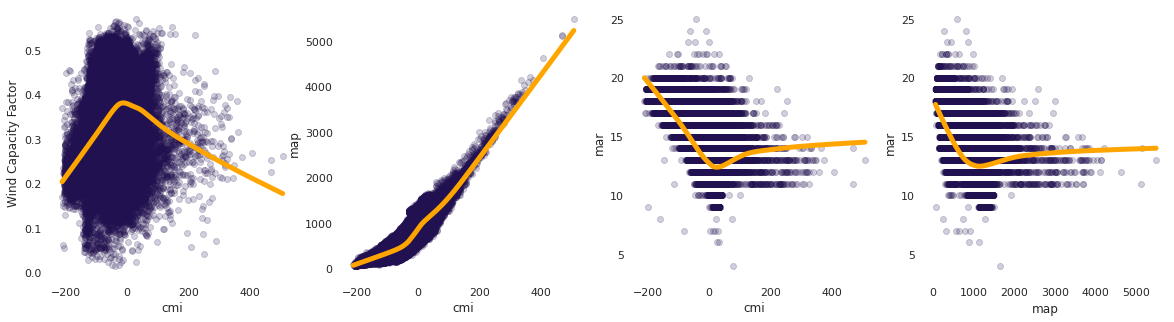

In [ ]:
fig,axs = plt.subplots(1,4,figsize=(20,5))
sns.regplot(wind['cmi'],wind['Wind Capacity Factor'],lowess=True,ax=axs[0],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(wind['cmi'],wind['map'],lowess=True,ax=axs[1],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(wind['cmi'],wind['mar'],lowess=True,ax=axs[2],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
sns.regplot(wind['map'],wind['mar'],lowess=True,ax=axs[3],scatter_kws={'alpha':0.2},line_kws={'color':'orange','lw':5})
# plt.savefig('solar_x_prec.png',bbox_inches='tight')

# Distributions of most important variables
### Solar

In [ ]:
files

['ssp2_10_41', 'ssp2_41_70', 'ssp5_11_40', 'ssp5_41_70', 'normal']

In [ ]:
# fig,ax = plt.subplots(1,5,figsize=(25,5))
map = []
msp = []
cmi = []
emt = []
mcmt = []
ppt_at = []
value_vars = []
for i,v in enumerate(files):
  wind_x, wind_y, solar_x, solar_y, wind_df, solar_df = get_x_y(dfs[-i])
  solar_df.columns = [col.lower() for col in solar_df.columns]

  if v == 'ssp2_10_41':
    title = 'SSP2-4.5 Years 11-40 Wind Capacity Factor'
  elif v == 'ssp2_41_70':
    title = 'SSP2-4.5 Years 41-70 Wind Capacity Factor'
  elif v == 'ssp5_11_40':
    title = 'SSP5-8.5 Years 11-40 Wind Capacity Factor'
  elif v == 'ssp5_41_70':
    title = 'SSP5-8.5 Years 41-70 Wind Capacity Factor'
  elif v == 'normal':
    title = 'NREL 2020 Calculated Wind Capacity Factor'
  value_vars.append(title)
  map.append(solar_df.rename({'map':title},axis=1)[['latitude','longitude',title]])
  msp.append(solar_df.rename({'msp':title},axis=1)[['latitude','longitude',title]])
  cmi.append(solar_df.rename({'cmi':title},axis=1)[['latitude','longitude',title]])
  emt.append(solar_df.rename({'emt':title},axis=1)[['latitude','longitude',title]])
  mcmt.append(solar_df.rename({'mcmt':title},axis=1)[['latitude','longitude',title]])
  ppt_at.append(solar_df.rename({'ppt_at':title},axis=1)[['latitude','longitude',title]])
  # titlelist = v.upper().split('_')
  # if v != 'normal':
  #   solar_x.mar.plot.hist(ax=ax[i],title=f'{titlelist[0]} {titlelist[1]}-{titlelist[2]}')
  # else:
  #   solar_x.mar.plot.hist(ax=ax[i],title=f'{titlelist[0]}')

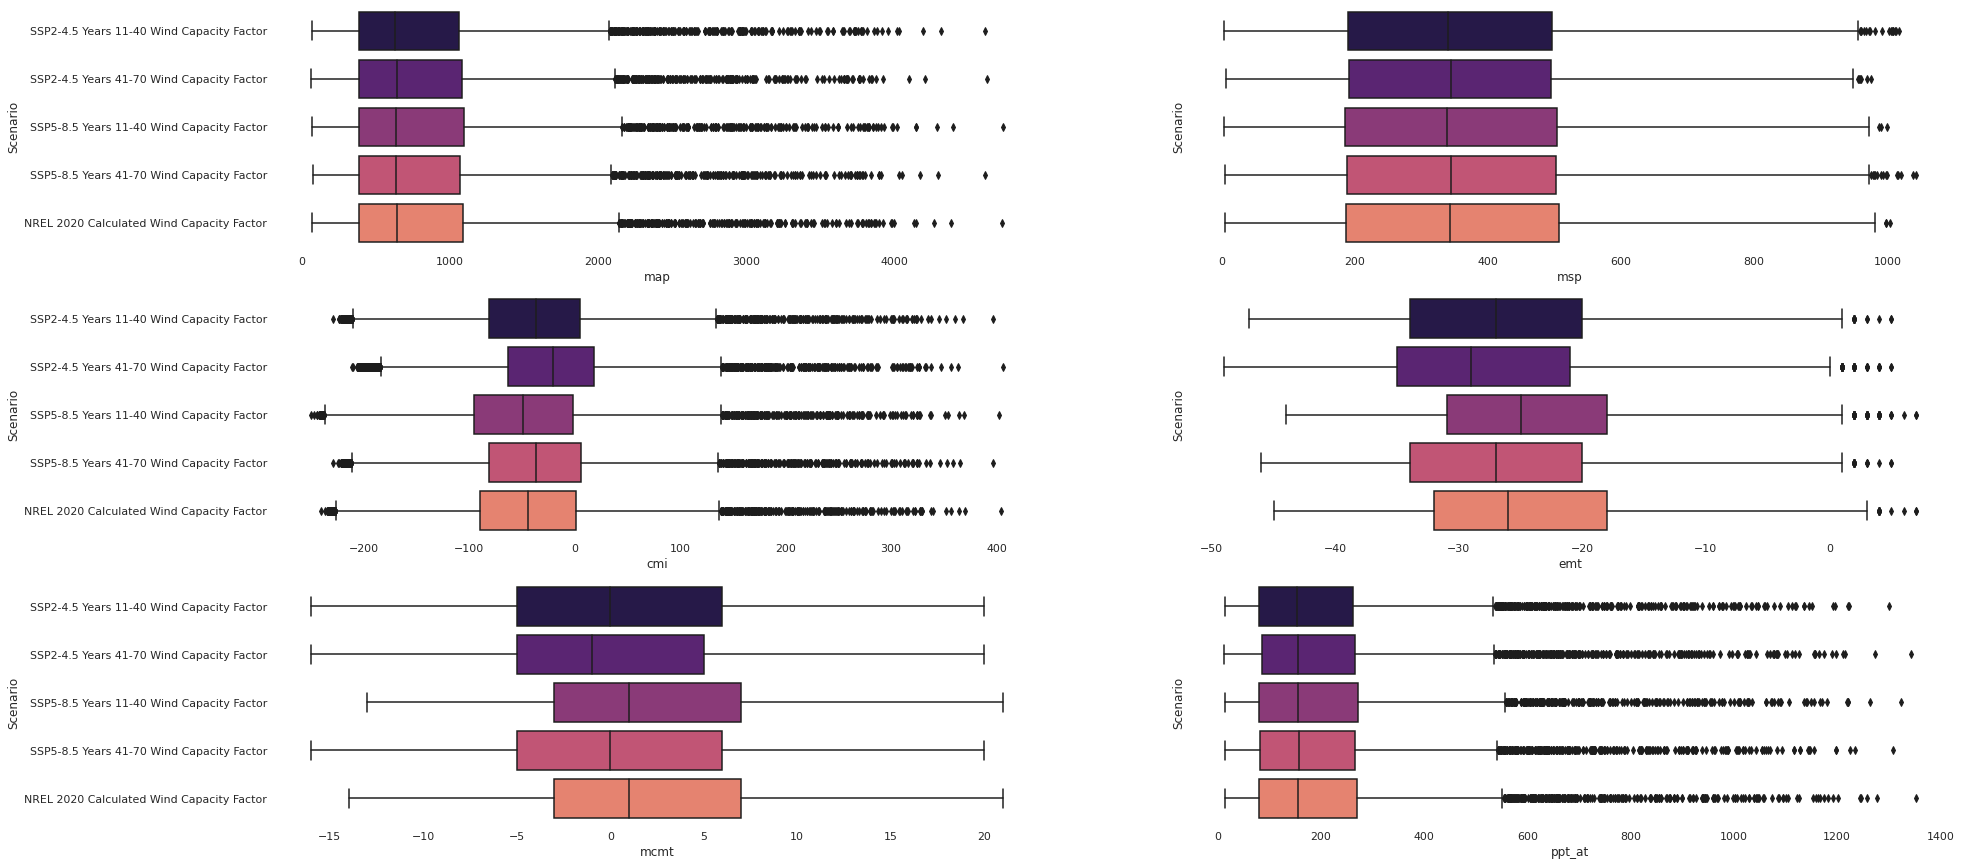

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(30,15),sharey=True)
map_boxplot = map[0].merge(map[1],on=['latitude','longitude']).merge(map[2],on=['latitude','longitude']).merge(map[3],on=['latitude','longitude']).merge(map[4],on=['latitude','longitude'])
map_boxplot = pd.melt(map_boxplot, id_vars=['latitude','longitude'], value_vars=value_vars)
sns.boxplot(data=map_boxplot.rename({'variable':'Scenario','value':'map'},axis=1), x='map', y='Scenario',ax=ax[0,0])

msp_boxplot = msp[0].merge(msp[1],on=['latitude','longitude']).merge(msp[2],on=['latitude','longitude']).merge(msp[3],on=['latitude','longitude']).merge(msp[4],on=['latitude','longitude'])
msp_boxplot = pd.melt(msp_boxplot, id_vars=['latitude','longitude'], value_vars=value_vars)
sns.boxplot(data=msp_boxplot.rename({'variable':'Scenario','value':'msp'},axis=1), x='msp', y='Scenario',ax=ax[0,1])

cmi_boxplot = cmi[0].merge(cmi[1],on=['latitude','longitude']).merge(cmi[2],on=['latitude','longitude']).merge(cmi[3],on=['latitude','longitude']).merge(cmi[4],on=['latitude','longitude'])
cmi_boxplot = pd.melt(cmi_boxplot, id_vars=['latitude','longitude'], value_vars=value_vars)
sns.boxplot(data=cmi_boxplot.rename({'variable':'Scenario','value':'cmi'},axis=1), x='cmi', y='Scenario',ax=ax[1,0])

emt_boxplot = emt[0].merge(emt[1],on=['latitude','longitude']).merge(emt[2],on=['latitude','longitude']).merge(emt[3],on=['latitude','longitude']).merge(emt[4],on=['latitude','longitude'])
emt_boxplot = pd.melt(emt_boxplot, id_vars=['latitude','longitude'], value_vars=value_vars)
sns.boxplot(data=emt_boxplot.rename({'variable':'Scenario','value':'emt'},axis=1), x='emt', y='Scenario',ax=ax[1,1])

mcmt_boxplot = mcmt[0].merge(mcmt[1],on=['latitude','longitude']).merge(mcmt[2],on=['latitude','longitude']).merge(mcmt[3],on=['latitude','longitude']).merge(mcmt[4],on=['latitude','longitude'])
mcmt_boxplot = pd.melt(mcmt_boxplot, id_vars=['latitude','longitude'], value_vars=value_vars)
sns.boxplot(data=mcmt_boxplot.rename({'variable':'Scenario','value':'mcmt'},axis=1), x='mcmt', y='Scenario',ax=ax[2,0])

ppt_at_boxplot = ppt_at[0].merge(ppt_at[1],on=['latitude','longitude']).merge(ppt_at[2],on=['latitude','longitude']).merge(ppt_at[3],on=['latitude','longitude']).merge(ppt_at[4],on=['latitude','longitude'])
ppt_at_boxplot = pd.melt(ppt_at_boxplot, id_vars=['latitude','longitude'], value_vars=value_vars)
sns.boxplot(data=ppt_at_boxplot.rename({'variable':'Scenario','value':'ppt_at'},axis=1), x='ppt_at', y='Scenario',ax=ax[2,1])
plt.savefig('distribution_across_scenarios.png',bbox_inches='tight')
# # plt.savefig('map_distribution.png',bbox_inches='tight')

# Post Modelling: Outcome Plots based on State

In [ ]:
solar_list = []
wind_list = []
for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
      if not 'model' in file:
        if file.startswith('solar'):
            solar_list.append(pd.read_csv(os.getcwd()+'/'+file).add_prefix(f"{file.split('.')[0]}_").rename({f"{file.split('.')[0]}_NAME":'State'},axis=1).set_index('State'))
        if file.startswith('wind'):
            wind_list.append(pd.read_csv(os.getcwd()+'/'+file).add_prefix(f"{file.split('.')[0]}_").rename({f"{file.split('.')[0]}_NAME":'State'},axis=1).set_index('State'))
            # print(file.split('.')[0])

In [ ]:
solar = solar_list[0].join(solar_list[1]).join(solar_list[2]).join(solar_list[3]).join(solar_list[4])
wind = wind_list[0].join(wind_list[1]).join(wind_list[2]).join(wind_list[3]).join(wind_list[4])
solar_mean_col = [col for col in solar.columns if 'mean' in col]
wind_mean_col = [col for col in wind.columns if 'mean' in col]

In [ ]:
solar['SSP5-8.5 Years 41-70 vs Current PV Capacity Factor'] = solar['solar_ssp5_41_70_PV Capacity Factor_mean'] - solar['solar_normal_PV Capacity Factor_mean']
solar['SSP2-4.5 Years 41-70 vs Current PV Capacity Factor'] = solar['solar_ssp2_41_70_PV Capacity Factor_mean'] - solar['solar_normal_PV Capacity Factor_mean']

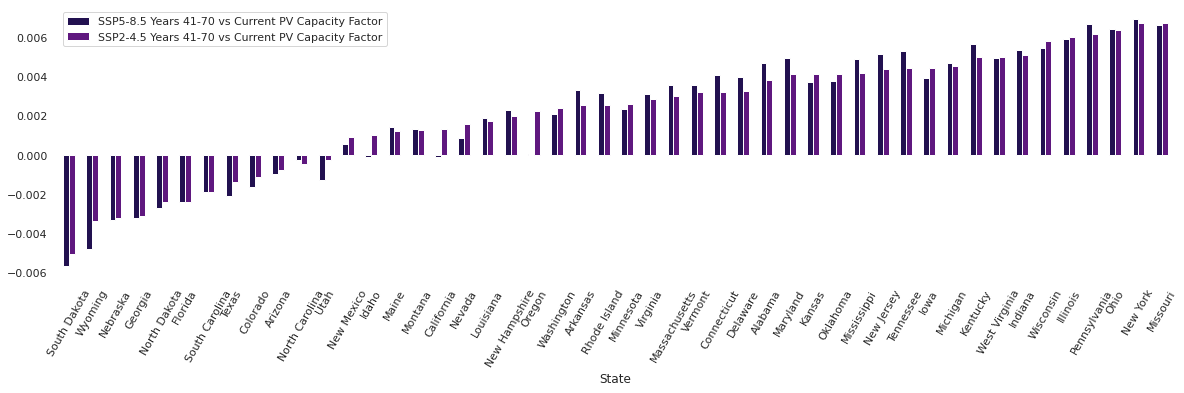

In [ ]:
solar[['SSP5-8.5 Years 41-70 vs Current PV Capacity Factor','SSP2-4.5 Years 41-70 vs Current PV Capacity Factor']].sort_values('SSP2-4.5 Years 41-70 vs Current PV Capacity Factor').dropna().plot(kind='bar')
plt.xticks(rotation=60)

plt.savefig('pv_cap_dif.png',bbox_inches='tight')
# plt.savefig('pv_cap_dif.png')

In [ ]:
wind['SSP5-8.5 Years 41-70 vs Current Wind Capacity Factor'] = wind['wind_5_41_70_Wind Capacity Factor_mean'] - wind['wind_normal_capacity_f_mean']
wind['SSP2-4.5 Years 41-70 vs Current Wind Capacity Factor'] = wind['wind_ssp2_41_70_Wind Capacity Factor_mean'] - wind['wind_normal_capacity_f_mean']

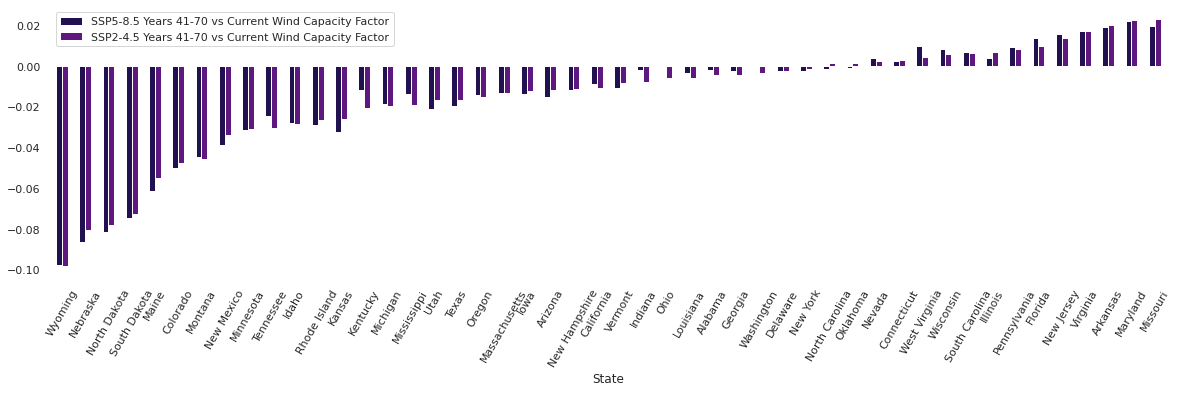

In [ ]:
wind[['SSP5-8.5 Years 41-70 vs Current Wind Capacity Factor','SSP2-4.5 Years 41-70 vs Current Wind Capacity Factor']].sort_values('SSP2-4.5 Years 41-70 vs Current Wind Capacity Factor').dropna().plot(kind='bar')
plt.xticks(rotation=60)

plt.savefig('wind_cap_dif.png',bbox_inches='tight')


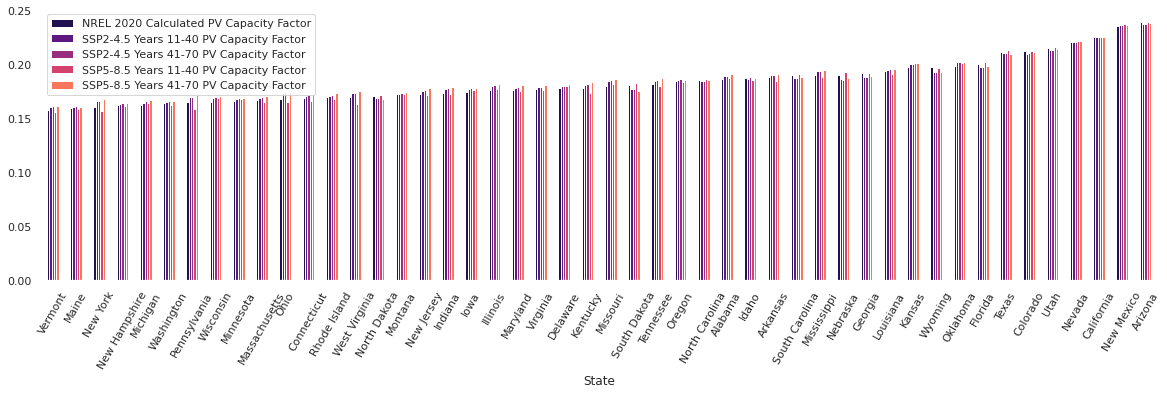

In [ ]:
ss = solar[solar_mean_col]
ss = ss.rename({solar_mean_col[0]: 'SSP2-4.5 Years 11-40 PV Capacity Factor',
           solar_mean_col[1]: 'SSP5-8.5 Years 11-40 PV Capacity Factor',
           solar_mean_col[2]: 'NREL 2020 Calculated PV Capacity Factor',
           solar_mean_col[4]: 'SSP5-8.5 Years 41-70 PV Capacity Factor',
           solar_mean_col[5]: 'SSP2-4.5 Years 41-70 PV Capacity Factor',
           },axis=1).drop(solar_mean_col[3],axis=1)
ss = ss[['NREL 2020 Calculated PV Capacity Factor',
   'SSP2-4.5 Years 11-40 PV Capacity Factor',
    'SSP2-4.5 Years 41-70 PV Capacity Factor',
   'SSP5-8.5 Years 11-40 PV Capacity Factor',
    'SSP5-8.5 Years 41-70 PV Capacity Factor',
    ]]
ss.sort_values('NREL 2020 Calculated PV Capacity Factor',).dropna().plot(kind='bar')
plt.xticks(rotation=60)

plt.savefig('solar_caps.png',bbox_inches='tight')


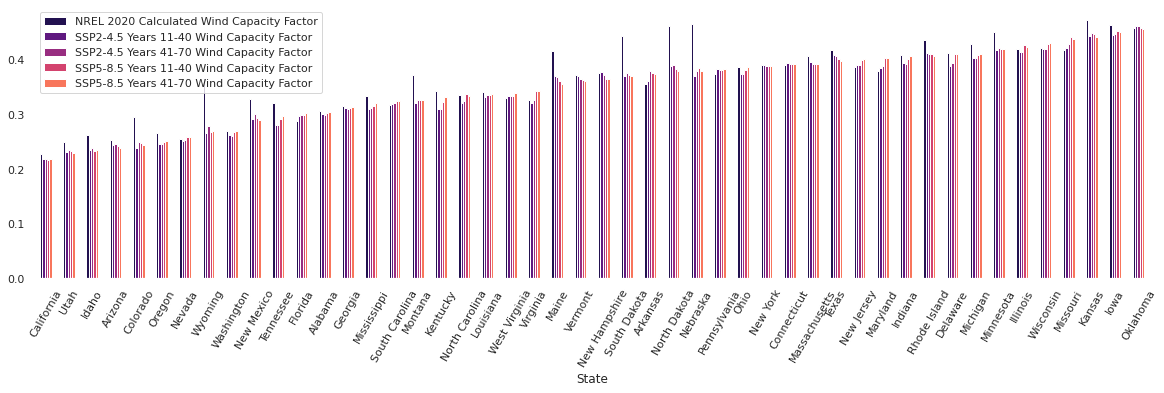

In [ ]:
ss = wind[wind_mean_col]
ss = ss.rename({wind_mean_col[0]:'NREL 2020 Calculated Wind Capacity Factor',
           wind_mean_col[2]: 'SSP5-8.5 Years 41-70 Wind Capacity Factor',
           wind_mean_col[3]: 'SSP2-4.5 Years 41-70 Wind Capacity Factor',
           wind_mean_col[4]: 'SSP5-8.5 Years 11-40 Wind Capacity Factor',
           wind_mean_col[5]: 'SSP2-4.5 Years 11-40 Wind Capacity Factor',
           },axis=1).drop(wind_mean_col[1],axis=1)
ss = ss[['NREL 2020 Calculated Wind Capacity Factor',
   'SSP2-4.5 Years 11-40 Wind Capacity Factor',
    'SSP2-4.5 Years 41-70 Wind Capacity Factor',
   'SSP5-8.5 Years 11-40 Wind Capacity Factor',
    'SSP5-8.5 Years 41-70 Wind Capacity Factor',
    ]]
ss.sort_values('SSP5-8.5 Years 41-70 Wind Capacity Factor',).dropna().plot(kind='bar')
plt.xticks(rotation=60)

plt.savefig('wind_caps.png',bbox_inches='tight')

# Outcome Boxplots

In [7]:

solar_model = []
wind_model = []
df_names = ['ssp2_10_40','ssp2_41_70','ssp5_10_40','ssp5_41_70','normal']
for df_name in df_names:
  df = pd.read_csv(f'wind_{df_name}_model4_2_outcome.csv')
  if df_name == 'ssp2_10_40':
    df['Scenario'] = 'SSP2-4.5 Years 11-40 Wind Capacity Factor'
  elif df_name == 'ssp2_41_70':
    df['Scenario'] = 'SSP2-4.5 Years 41-70 Wind Capacity Factor'
  elif df_name == 'ssp5_10_40':
    df['Scenario'] = 'SSP5-8.5 Years 11-40 Wind Capacity Factor'
  elif df_name == 'ssp5_41_70':
    df['Scenario'] = 'SSP5-8.5 Years 41-70 Wind Capacity Factor'
  elif df_name == 'normal':
    df['Scenario'] = 'Predicted 2020 Wind Capacity Factor'
  wind_model.append(df)
  df = pd.read_csv(f'{df_name}_model4_2_outcome.csv')
  if df_name == 'ssp2_10_40':
    df['Scenario'] = 'SSP2-4.5 Years 11-40 PV Capacity Factor'
  elif df_name == 'ssp2_41_70':
    df['Scenario'] = 'SSP2-4.5 Years 41-70 PV Capacity Factor'
  elif df_name == 'ssp5_10_40':
    df['Scenario'] = 'SSP5-8.5 Years 11-40 PV Capacity Factor'
  elif df_name == 'ssp5_41_70':
    df['Scenario'] = 'SSP5-8.5 Years 41-70 PV Capacity Factor'
  elif df_name == 'normal':
    df['Scenario'] = 'Predicted 2020 PV Capacity Factor'
  solar_model.append(df)

In [25]:
sol_actual = pd.DataFrame(solar_model[4].pv_capacit).rename({'pv_capacit':'PV Capacity Factor'},axis=1)
sol_actual['Scenario'] = 'NREL 2020 Calculated PV Capacity Factor'
wind_actual = pd.DataFrame(wind_model[4].capacity_f).rename({'capacity_f':'Wind Capacity Factor'},axis=1)
wind_actual['Scen5rio'] = 'NREL 2020 Calculated Wind Capacity Factor'

In [9]:
solar_boxplot_df = pd.concat([pd.concat(solar_model),sol_actual])[['PV Capacity Factor','Scenario']]
wind_boxplot_df = pd.concat([pd.concat(wind_model),wind_actual])[['Wind Capacity Factor','Scenario']]

In [49]:
solar_sum = solar_model[0][['PV Capacity Factor']].describe().rename({'PV Capacity Factor':solar_model[0].Scenario.unique()[0]},axis=1)
for i in range(1,5):
    a = solar_model[i][['PV Capacity Factor']].describe()
    a = a.rename({'PV Capacity Factor':solar_model[i].Scenario.unique()[0]},axis=1)
    solar_sum = solar_sum.join(a)
b = sol_actual[['PV Capacity Factor']].describe()
b = b.rename({'PV Capacity Factor':sol_actual.Scenario.unique()[0]},axis=1)
round(solar_sum.join(b),5)

,SSP2-4.5 Years 11-40 PV Capacity Factor,SSP2-4.5 Years 41-70 PV Capacity Factor,SSP5-8.5 Years 11-40 PV Capacity Factor,SSP5-8.5 Years 41-70 PV Capacity Factor,Predicted 2020 PV Capacity Factor,NREL 2020 Calculated PV Capacity Factor
count,54741.00000,54741.00000,54737.00000,54738.00000,52580.00000,52580.00000
mean,0.19326,0.19425,0.19354,0.19392,0.19303,0.19327
std,0.02307,0.02289,0.02283,0.02264,0.02433,0.02498
min,0.13091,0.13263,0.13257,0.13367,0.12861,0.12190
25%,0.17566,0.17652,0.17610,0.17636,0.17410,0.17423
50%,0.18875,0.19002,0.18903,0.18989,0.18872,0.18855
75%,0.20657,0.20737,0.20672,0.20640,0.20798,0.20947
max,0.25113,0.25280,0.25247,0.25050,0.25657,0.26385


In [50]:
wind_sum = wind_model[0][['Wind Capacity Factor']].describe().rename({'Wind Capacity Factor':wind_model[0].Scenario.unique()[0]},axis=1)
for i in range(1,5):
    a = wind_model[i][['Wind Capacity Factor']].describe()
    a = a.rename({'Wind Capacity Factor':wind_model[i].Scenario.unique()[0]},axis=1)
    wind_sum = wind_sum.join(a)
b = wind_actual[['Wind Capacity Factor']].describe()
b = b.rename({'Wind Capacity Factor':wind_actual.Scen5rio.unique()[0]},axis=1)
round(wind_sum.join(b),5)

,SSP2-4.5 Years 11-40 Wind Capacity Factor,SSP2-4.5 Years 41-70 Wind Capacity Factor,SSP5-8.5 Years 11-40 Wind Capacity Factor,SSP5-8.5 Years 41-70 Wind Capacity Factor,Predicted 2020 Wind Capacity Factor,NREL 2020 Calculated Wind Capacity Factor
count,57425.00000,57422.00000,57419.00000,57421.00000,54688.00000,54688.00000
mean,0.33502,0.33553,0.33208,0.33497,0.35183,0.35500
std,0.08303,0.08367,0.08341,0.08271,0.08618,0.09449
min,0.03944,0.04145,0.04107,0.04829,0.05499,0.01400
25%,0.27239,0.27228,0.26937,0.27168,0.28530,0.28887
50%,0.33724,0.33834,0.33213,0.33828,0.35563,0.36197
75%,0.40330,0.40545,0.40069,0.40495,0.42917,0.43486
max,0.52431,0.53440,0.52270,0.52990,0.55947,0.57117


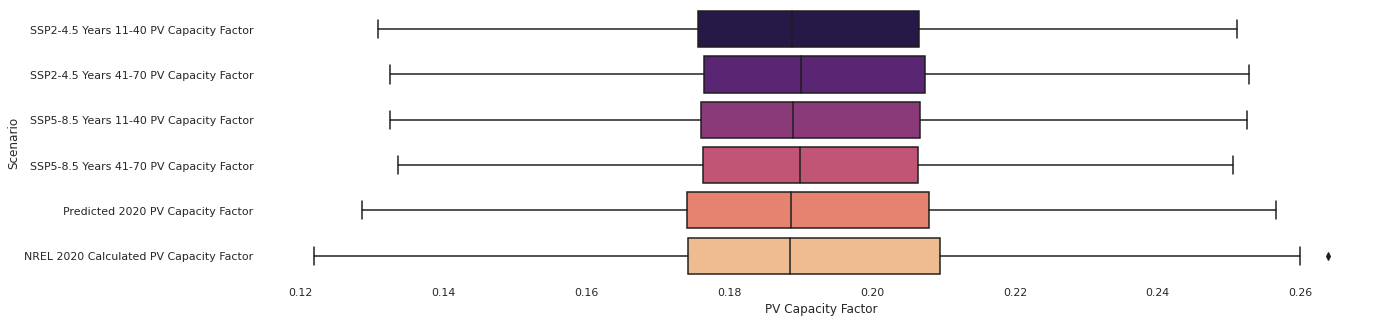

In [10]:
sns.boxplot(data=solar_boxplot_df, x='PV Capacity Factor', y='Scenario')
plt.autoscale()
plt.savefig('solar_outcomes_boxplot.png',bbox_inches='tight')


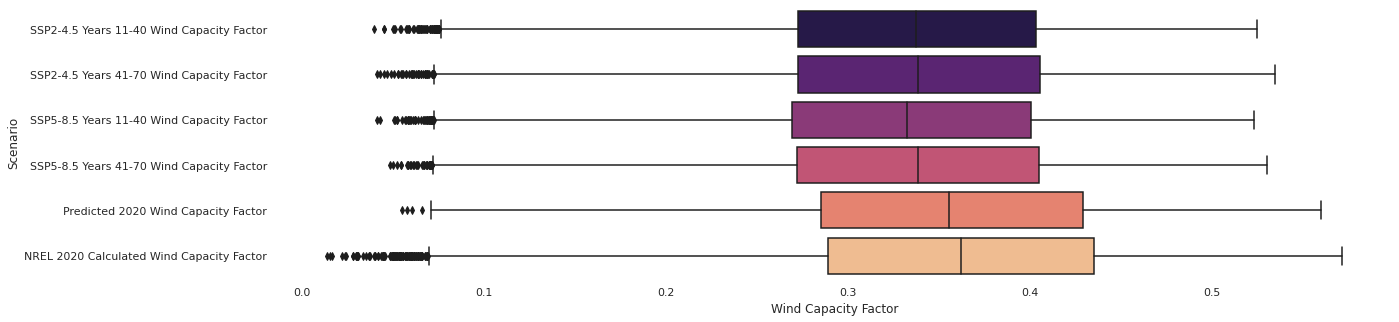

In [11]:
sns.boxplot(data=wind_boxplot_df, x='Wind Capacity Factor', y='Scenario')
plt.autoscale()
plt.savefig('wind_outcomes_boxplot.png',bbox_inches='tight')